# Fitting Linear Regression

In [16]:
import Data_Helper as DH
import lendingclub
import prediction
import investment
import backtester

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import time
import sklearn
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

pd.options.mode.chained_assignment = None  # default='warn'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Instantiate Objects

In [2]:
# initialize config object
config = lendingclub.ConfigData("config_data_dummy.ini")

# initialize lendingclup api object
lc = lendingclub.LendingClub(config)

# initialize data transformer
transformer = DH.Transformer_full()

# initialize DataHelper
periodStart = ("Q1", "2014")
periodEnd = ("Q2", "2016")
DataHelper = DH.DataHelper(periodStart, periodEnd, transformer, lc)

In [3]:
# set training data
DataHelper.set_training_dataset()

In [4]:
# set test data
DataHelper.set_test_dataset(["LoanStats_2016Q3.csv", "LoanStats_2016Q4.csv"])

## Fit Linear Regression

Check that the R2 is just so bad....

In [5]:
# linear regression model
linear_model = prediction.ModelLinear()

In [6]:
# get training/test for this model
training, test = linear_model.get_data_for_model(DataHelper.training, DataHelper.test)

In [7]:
kwargs = {}
model = linear_model.fit_model(training, **kwargs)
score = linear_model.test_model(test, model)
print("Raw test score:", score)

Raw test score: {'score': -0.07620122070009196, 'MSE': 0.07962578296338665}


In [8]:
linear_model.y_variable = "log_return"

In [9]:
# get training/test for this model
training, test = linear_model.get_data_for_model(DataHelper.training, DataHelper.test)

In [10]:
kwargs = {}
model = linear_model.fit_model(training, **kwargs)
score = linear_model.test_model(test, model)
print("Raw test score:", score) 

Raw test score: {'score': -0.055655328472529624, 'MSE': 0.026470065647968163}


## Fit Lasso Regression

In [5]:
# linear regression model
lasso_model = prediction.ModelLinearLasso()

In [6]:
# get CV index from DataHelper
CVs = DataHelper.get_cross_validation_data(fold=5)

In [7]:
# choose grids to fit
grids = [{"alpha": x} for x in [0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]]

In [8]:
scores = lasso_model.tune_parameters(DataHelper.training, CVs, grids, verbose=True)

fitting for {'alpha': 0.05}
{'score': -0.0009331176177977962, 'MSE': 0.017409167267289576}
{'score': -0.00010629373943582543, 'MSE': 0.017455250923123975}
{'score': -0.00014335047853708538, 'MSE': 0.01661064072078286}
{'score': -0.00030706777407618624, 'MSE': 0.01673909015714817}
{'score': -0.00014908258787182938, 'MSE': 0.016773251504990733}
fitting for {'alpha': 0.01}
{'score': 0.00043688600573343894, 'MSE': 0.017385338879738952}
{'score': 0.0013162288741613848, 'MSE': 0.017430423073004846}
{'score': 0.0013255885540108814, 'MSE': 0.01658624419952547}
{'score': 0.0011854056518944, 'MSE': 0.016714115178924675}
{'score': 0.0013838413962238283, 'MSE': 0.0167475432181254}
fitting for {'alpha': 0.005}
{'score': 0.005339572030847783, 'MSE': 0.0173000667675789}
{'score': 0.00574049180573355, 'MSE': 0.01735320466121812}
{'score': 0.006175014924078015, 'MSE': 0.016505703665914428}
{'score': 0.0057535362701204296, 'MSE': 0.01663767230180068}
{'score': 0.00578543361762951, 'MSE': 0.0166737252097

In [10]:
# choose best Grid
_, avg_score, param = lasso_model.best_grid(scores, "MSE")
print(avg_score)
print("alpha: {}".format(param["alpha"]))

0.0167141896453518
alpha: 1e-05


In [11]:
# get training/test for this model
training, test = lasso_model.get_data_for_model(DataHelper.training, DataHelper.test)

In [12]:
kwargs = {"alpha":1e-5}
model = lasso_model.fit_model(training, **kwargs)
score = lasso_model.test_model(test, model)
print("Raw test score:", score)

Raw test score: {'score': -0.04173597733975809, 'MSE': 0.026121044401805644}


Rerun this with log_return variables...

In [13]:
lasso_model.y_variable = "log_return"

In [14]:
# choose grids to fit
grids = [{"alpha": x} for x in [0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]]

In [15]:
scores = lasso_model.tune_parameters(DataHelper.training, CVs, grids, verbose=True)

fitting for {'alpha': 0.05}
{'score': -0.0009331176177977962, 'MSE': 0.017409167267289576}
{'score': -0.00010629373943582543, 'MSE': 0.017455250923123975}
{'score': -0.00014335047853708538, 'MSE': 0.01661064072078286}
{'score': -0.00030706777407618624, 'MSE': 0.01673909015714817}
{'score': -0.00014908258787182938, 'MSE': 0.016773251504990733}
fitting for {'alpha': 0.01}
{'score': 0.00043688600573343894, 'MSE': 0.017385338879738952}
{'score': 0.0013162288741613848, 'MSE': 0.017430423073004846}
{'score': 0.0013255885540108814, 'MSE': 0.01658624419952547}
{'score': 0.0011854056518944, 'MSE': 0.016714115178924675}
{'score': 0.0013838413962238283, 'MSE': 0.0167475432181254}
fitting for {'alpha': 0.005}
{'score': 0.005339572030847783, 'MSE': 0.0173000667675789}


KeyboardInterrupt: 

In [ ]:
# choose best Grid
_, avg_score, param = lasso_model.best_grid(scores, "MSE")
print(avg_score)
print("alpha: {}".format(param["alpha"]))

In [ ]:
# get training/test for this model
training, test = lasso_model.get_data_for_model(DataHelper.training, DataHelper.test)

In [33]:
kwargs = {"alpha":1e-5}
model = lasso_model.fit_model(training, **kwargs)
score = lasso_model.test_model(test, model)
print("Raw test score:", score)

Raw test score: {'score': -0.04173597733975809, 'MSE': 0.026121044401805644}


Let's save the model for now.

In [28]:
scaler = lasso_model.get_scaler(DataHelper.training)

In [29]:
filename = "lasso_regression_20190622.sav"

In [30]:
lasso_model.save_model(model,scaler,training,filename)

Model is saved on lasso_regression_20190622.sav


## Set Base Model

In [4]:
filename = "lasso_regression_20190622.sav"

# instantiate from beginning
lasso = prediction.ModelLinearLasso(filename)

# set y_variable
lasso.y_variable = "log_return"

# update from the saved model
lasso.set_model_from_file()

# check model description
lasso.model_description

Model is loaded from lasso_regression_20190622.sav


'Lasso Linear Regression Object, time: 06/22/2019, alpha: 1e-05, max_iter: 1000, tol: 1e-05'

## Backtesting

Wtih $20,000 investments and 0.65 cut, we get 3.5% return. This is not too bad. With better regression results, we can expect higher return. Let's move on to Gradient Boosting Regression.

In [11]:
def optimize_cut_conservative(cuts, initialInvest, DataHelper, model, strat, n, plot=False):
    
    profits = []
    for cut in cuts:
        
        # set cut of strateg
        strat.cut = cut
        
        # set initial investment of Backtester
        Backtester = backtester.Backtester(DataHelper, model, strat, n)
        Backtester.initialInvest = initialInvest
        
        # append return
        _, r, _ = Backtester.backtest_OOT(returnAll=False)
        profits.append(r)
        
    if plot:
        plt.plot(profits)
        plt.show()
        
    return profits

In [12]:
def optimize_initial_conservative(cuts, initialInvests, DataHelper, model, strat, n):
    
    results = []
    
    plt.figure(figsize=(10,8))
    for initial in initialInvests:
        profits = optimize_cut_conservative(cuts, initial, DataHelper, model, strat, n)
        
        # append maximum
        ind = np.argmax(profits)
        results.append({"initialInvest":initial,"cut":cuts[ind], "return": profits[ind]})
        plt.plot(cuts, profits)
    
    names = ["m:{}".format(x) for x in initialInvests]
    plt.legend(names, loc='upper left')
    plt.show()
    return results
    

In [13]:
strat = investment.StrategyRegSimple(lasso)
print(strat.description())

This strategy chooses loans basaed on the simple epected return cut. In other words, it only invests to the loans with the model scores higher than the cut. It further filters out the selected loan by FICO score.


In [14]:
initial = 10000
cuts = [0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]

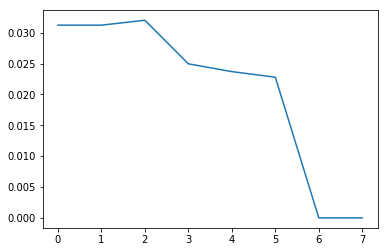

[0.0312094909761226,
 0.0312094909761226,
 0.03200515889696374,
 0.02495015898501658,
 0.02368884316441894,
 0.022780723195216165,
 0.0,
 0.0]

In [15]:
profits = optimize_cut_conservative(cuts, initial, DataHelper, lasso, strat, 1, plot=True)
profits

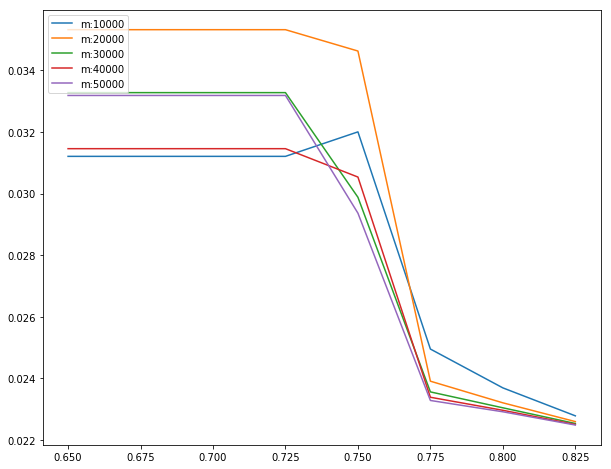

[{'initialInvest': 10000, 'cut': 0.75, 'return': 0.03200515889696374},
 {'initialInvest': 20000, 'cut': 0.65, 'return': 0.03532424149700402},
 {'initialInvest': 30000, 'cut': 0.65, 'return': 0.03327979956295688},
 {'initialInvest': 40000, 'cut': 0.65, 'return': 0.0314589211145746},
 {'initialInvest': 50000, 'cut': 0.65, 'return': 0.03318762048373805}]

In [17]:
initialInvests = np.array(range(1,6)) * 10000
cuts = [0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825]
profits = optimize_initial_conservative(cuts, initialInvests, DataHelper, lasso, strat, 1)
profits